# Tensor Flow and MNIST Multi-Layer Perceptron
*** 
<a href='https://github.com/pick1'> <img src='tensorflow.jpg' /></a>
<a href='https://github.com/pick1'> <img src='download.png' /></a>
***
#### This project used Tensor Flow to analyze the popular [Modified National Institute of Standards and Technology](https://en.wikipedia.org/wiki/MNIST_databaseMNIST) (MNIST) dataset. The dataset contains over 50,000 examples of handwritten numbers. 

#### Tensor Flow was used to create multi-layer perceptron or 'Deep Learning' network to take, in the pixel information from the MNIST dataset and correctly classify the numbers. This project explored Tensor Flow parameters pertaining to: learning rate; number of training epochs and batch size.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Loading and Extracting the MNIST dataset from TensorFlow

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x71a2272ebeb8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x71a2272fc6a0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x71a2272f81d0>)

In [5]:
mnist.train.images.shape

(55000, 784)

## Visualizing a sample image with matplotlib

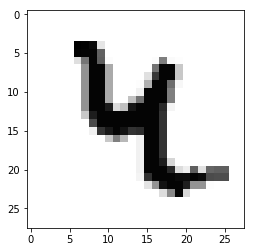

In [6]:
sample = mnist.train.images[32].reshape(28,28)
plt.imshow(sample, cmap = 'Greys');

## Training Parameters:
***
** Learning Rate: How quickly we adjust the cost function - tradeoffs of large value vs. small value**

** Training Epochs: How many training cycles**

** Batch size: Batch size of training data**

In [29]:
learning_rate = 0.001
training_epochs = 100
batch_size = 100

## Network Parameters:
***
**n_classes: Values 0-9 from the MNIST dataset **

**n_samples: Number of samples in the dataset**

**n_input: Shape of the input array**

**n_hidden: The number of hidden layers (2) and number of neurons (256) used. 256 [8-bit color storage](https://en.wikipedia.org/wiki/8-bit_color) used because of way computers store image info**

In [30]:
n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256

## Creating Multi-Layer Perceptron
***
** Used the [Rectifier Linear Unit (ReLU)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) activation function, simple rectifier function which returns either x or 0, for whichever is greater.**

**x: placeholder for data input**

**weights: dictionary of weights**

**biases: dictionary of bias values**

In [31]:
def multilayer_perceptron(x, weights, biases):
    # First hidden layer with ReLU Activation
    
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    # ReLU(X * W + B) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last layer (output layer)
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

## Creating Weights and Biases Dictionaries

In [32]:
weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
           'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
           'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))}

In [33]:
weights

{'h1': <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>}

In [34]:
biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1])),
           'b2': tf.Variable(tf.random_normal([n_hidden_2])),
           'out': tf.Variable(tf.random_normal([n_classes]))}
biases

{'b1': <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 'b2': <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>}

## Setting placeholders

In [35]:
x = tf.placeholder('float', [None,n_input])
y = tf.placeholder('float', [None,n_classes])

## Constructing the Model

In [36]:
pred = multilayer_perceptron(x,weights, biases)

## Defining Cost and Optimization Functions

In [37]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

 ## Training the Model with the [.next_batch](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py) method

In [38]:
t = mnist.train.next_batch(1)
xsamp, ysamp = t

In [39]:
xsamp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

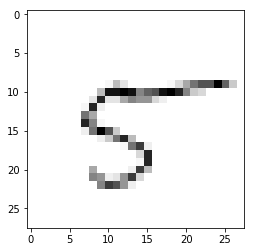

In [40]:
plt.imshow(xsamp.reshape(28,28), cmap='Greys');

In [41]:
ysamp

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

## Note: 
**At index there is a 1 in the 5th position which is the correct label/position for the above '5'.**
***
## Running the Session

In [42]:
sess = tf.InteractiveSession()

In [43]:
init = tf.global_variables_initializer()

In [44]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=169.5821
Epoch: 2 cost=40.2820
Epoch: 3 cost=25.0535
Epoch: 4 cost=17.4175
Epoch: 5 cost=12.7321
Epoch: 6 cost=9.3943
Epoch: 7 cost=6.8615
Epoch: 8 cost=5.1735
Epoch: 9 cost=3.9275
Epoch: 10 cost=2.9800
Epoch: 11 cost=2.2480
Epoch: 12 cost=1.6594
Epoch: 13 cost=1.3070
Epoch: 14 cost=0.9978
Epoch: 15 cost=0.8147
Epoch: 16 cost=0.6584
Epoch: 17 cost=0.5462
Epoch: 18 cost=0.5050
Epoch: 19 cost=0.5247
Epoch: 20 cost=0.5530
Epoch: 21 cost=0.3556
Epoch: 22 cost=0.3810
Epoch: 23 cost=0.2660
Epoch: 24 cost=0.2919
Epoch: 25 cost=0.3345
Epoch: 26 cost=0.2599
Epoch: 27 cost=0.2117
Epoch: 28 cost=0.2686
Epoch: 29 cost=0.3061
Epoch: 30 cost=0.2235
Epoch: 31 cost=0.2201
Epoch: 32 cost=0.2135
Epoch: 33 cost=0.2423
Epoch: 34 cost=0.2080
Epoch: 35 cost=0.1556
Epoch: 36 cost=0.2301
Epoch: 37 cost=0.1846
Epoch: 38 cost=0.1701
Epoch: 39 cost=0.2913
Epoch: 40 cost=0.1439
Epoch: 41 cost=0.1852
Epoch: 42 cost=0.1780
Epoch: 43 cost=0.2368
Epoch: 44 cost=0.1515
Epoch: 45 cost=0.1468
Epoch: 46 cos

## Model Evalutions

In [49]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [50]:
print(correct_predictions[0])

Tensor("strided_slice_4:0", shape=(), dtype=bool)


In [51]:
correct_predictions = tf.cast(correct_predictions,'float')
print(correct_predictions[0])

Tensor("strided_slice_5:0", shape=(), dtype=float32)


In [52]:
accuracy = tf.reduce_mean(correct_predictions)
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [53]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [54]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.966

## Conclusion
***
**96% not too bad! But this actually wasn't anywhere near as good as it could be. Running more training epochs with this data (around 20,000) this model could produce accuracy around 99%. This would take a very long time to run!**